In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

0_amons_global.out  3_moreout.out	    output_CM_global.csv
1_amons_global.out  4_amons_global.out	    output_FCHL.csv
1_amons.out	    4_amons.out		    output_FCHL_global.csv
1_moreout.out	    4_moreout.out	    output_SLATM.csv
2_amons_global.out  output_aCM.csv	    output_SLATM_global.csv
2_amons.out	    output_amons_aCM.csv    output_SOAP.csv
2_moreout.out	    output_amons_FCHL.csv   output_SPAHM_global.csv
3_amons_global.out  output_amons_SLATM.csv
3_amons.out	    output_amons_SOAP.csv


In [4]:
slatm_out = pd.read_csv("../out/output_CM_global.csv", index_col=0)

In [5]:
slatm_out

,SolN,Fragments,ObjValNoPen,ObjValWithPen
0,1,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
1,2,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
2,3,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
3,4,"['frag_02_c00001', 'frag_15_c00001']",14941.037533,14941.037533
4,5,"['frag_02_c00001', 'frag_16_c00001']",16189.235114,16189.235114
...,...,...,...,...
995,996,"['frag_01_c00001', 'frag_09_c00001', 'frag_11_...",70540.887222,60540.887222
996,997,"['frag_02_c00001', 'frag_05_c00001', 'frag_13_...",80575.033421,60575.033421
997,998,"['frag_02_c00001', 'frag_05_c00001', 'frag_13_...",80575.033421,60575.033421
998,999,"['frag_02_c00001', 'frag_05_c00001', 'frag_13_...",80575.033421,60575.033421


In [6]:
from ast import literal_eval 

In [7]:
slatm_out["Fragments"] = slatm_out["Fragments"].apply(literal_eval)

In [8]:
slatm_out["Sorted Fragments"] = slatm_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(slatm_out["Sorted Fragments"]))

168

In [10]:
# excess is missing Hs - to fix 

In [11]:
import qml

In [12]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [13]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [115]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [116]:
qm9_counts = count_ncharges(qm9_ncharges)

In [117]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [157]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../amons-qm9/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    diff_count = np.array(diff_count).astype(int)
    excess = []
    for i, count in enumerate(diff_count): 
        ncharge = [1,6,7,8,16][i]
        if count > 0 :
            for i in range(count):
                excess.append(ncharge)
        elif count < 0:
            for i in range(abs(count)):
                excess.append(-ncharge)
    return excess

In [158]:
slatm_out["Excess"] = slatm_out["Fragments"].apply(get_excess_frags)

In [159]:
slatm_out

,SolN,Fragments,ObjValNoPen,ObjValWithPen,Sorted Fragments,Excess
0,1,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]","[1, 1, 1, 1, 1, 6, -7]"
1,2,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]","[1, 1, 1, 1, 1, 6, -7]"
2,3,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]","[1, 1, 1, 1, 1, 6, -7]"
3,4,"[frag_02_c00001, frag_15_c00001]",14941.037533,14941.037533,"[frag_02_c00001, frag_15_c00001]","[1, 1, 1, 1, 1, 6, -7]"
4,5,"[frag_02_c00001, frag_16_c00001]",16189.235114,16189.235114,"[frag_02_c00001, frag_16_c00001]","[1, 1, 1, 1, 6, -8]"
...,...,...,...,...,...,...
995,996,"[frag_01_c00001, frag_09_c00001, frag_11_c00001]",70540.887222,60540.887222,"[frag_01_c00001, frag_09_c00001, frag_11_c00001]","[1, 1, 1, 1, 1, 1, 1, 6, -7, 8]"
996,997,"[frag_02_c00001, frag_05_c00001, frag_13_c00001]",80575.033421,60575.033421,"[frag_02_c00001, frag_05_c00001, frag_13_c00001]","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6]"
997,998,"[frag_02_c00001, frag_05_c00001, frag_13_c00001]",80575.033421,60575.033421,"[frag_02_c00001, frag_05_c00001, frag_13_c00001]","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6]"
998,999,"[frag_02_c00001, frag_05_c00001, frag_13_c00001]",80575.033421,60575.033421,"[frag_02_c00001, frag_05_c00001, frag_13_c00001]","[1, 1, 1, 1, 1, 1, 1, 1, 6, 6]"


In [80]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
# need ncharges list and list of energies

In [166]:
import qml

In [167]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [168]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [169]:
ncharges = [mol.nuclear_charges for mol in mols]

In [170]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [171]:
energies = qm7["energy / Ha"].to_list()

In [172]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [173]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [174]:
coeff_energies = reg.coef_

In [175]:
coeff_energies = dict(zip(elements, coeff_energies))

In [176]:
coeff_energies

{1: -0.610028423353568,
 6: -38.01906466911171,
 7: -54.647732784759256,
 8: -75.09076868694648,
 16: -397.9423885459585}

In [94]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../amons-qm9/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    energy = float(energy)
    return energy

In [177]:
def get_excess_energy(excess_ncharges):
    energy = 0.
    for ncharge in excess_ncharges:
        if ncharge < 0:
            ncharge = abs(ncharge)
            energy += -1 * coeff_energies[ncharge]
        else:
            energy += coeff_energies[ncharge]
    return energy

In [178]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [179]:
slatm_out["energies / Ha"] = slatm_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]),
                                                     axis=1)

In [180]:
slatm_out["energies / kcal/mol"] = slatm_out["energies / Ha"] * 627.5

In [182]:
import matplotlib.pyplot as plt
import matplotlib

In [183]:
matplotlib.rcParams.update({'font.size': 12})

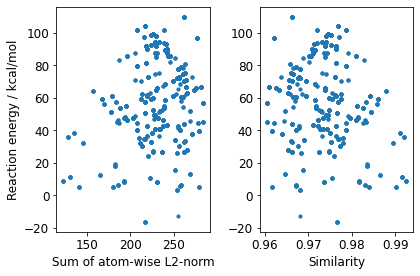

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(np.sqrt(slatm_out["ObjValNoPen"]), slatm_out["energies / kcal/mol"], s=10)
ax[0].set_xlabel("Sum of atom-wise L2-norm")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-slatm_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, slatm_out["energies / kcal/mol"], s=10)
ax[1].set_xlabel("Similarity")

plt.tight_layout()
plt.savefig("../figures/correlation-amons-cm-global.png", dpi=300)
plt.show()